# Libraries

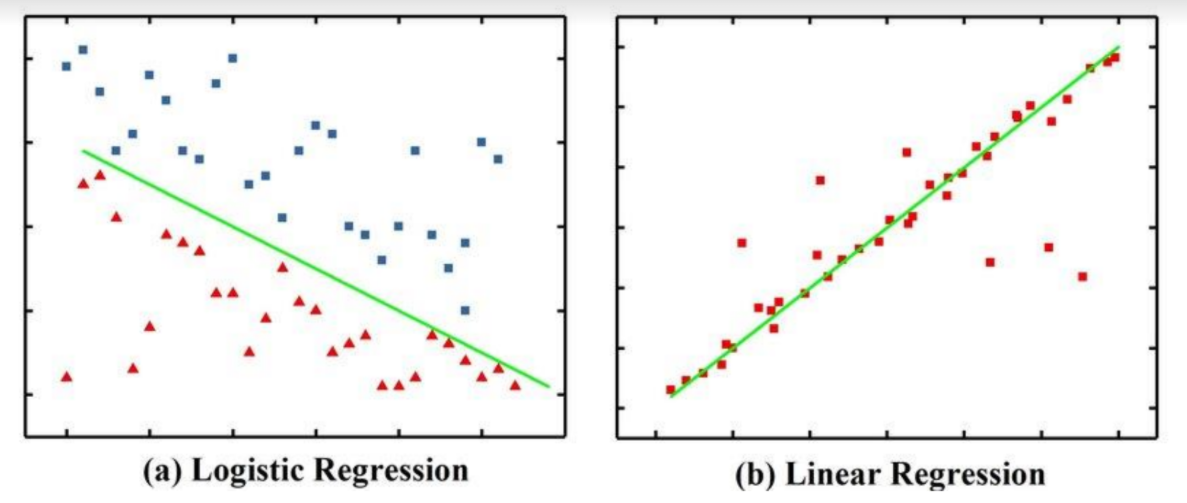

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
Image("IMG/Log_Lin_Reg.png")

# Gradient descent

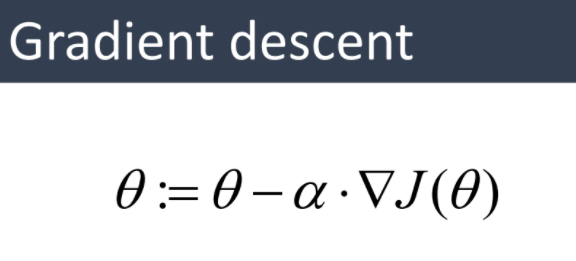

In [2]:
Image("IMG/Grad.png")

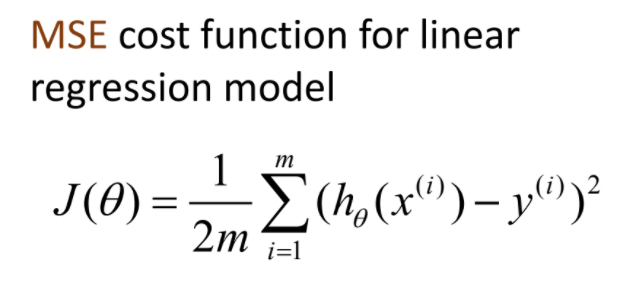

In [3]:
Image("IMG/Lin_reg.png")

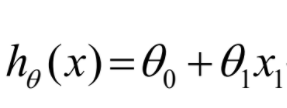

In [4]:
Image("IMG/H.png")

In [5]:
def d_da(x, y, a, b):
    res = np.zeros(len(x))
    for i in range(len(x)-1):
        res[i] = ( a * x[i] + b - y[i]) * x[i]
    return 2 * res.mean()
def d_db(x, y, a, b):
    res = np.zeros(len(x))
    for i in range(len(x)-1):
        res[i] = a*x[i] + b - y[i]
    return 2 * res.mean()
def grad_desc( a, b, x, y, lambda_a, lambda_b, n_iter):
    err = np.zeros(n_iter)
    for n in range(n_iter):
        a = a - lambda_a * d_da(x, y, a, b)
        b = b - lambda_b * d_db(x, y, a, b)
        err[n] = ((y-a*x-b)**2).mean()
    return a, b, err

In [6]:
def df_da(a,b,x,y):
    mas = np.zeros(len(x))
    for i in range(len(x)):
        mas[i] = ( a * x[i] + b - y[i]) * x[i]
    return 2 * mas.mean()
def df_db(a,b,x,y):
    mas = np.zeros(len(x))
    for i in range(len(x)):
        mas[i] = a*x[i] + b - y[i]
    return 2 * mas.mean()
def grad (x,y, l_a, l_b):
    n = 100; a = 0; b = 0
    errors = np.zeros(n)
    for i in range (n):
        a = a - l_a*df_da(a,b,x,y); b = b - l_b*df_db(a,b,x,y)
    return a, b

# Settings

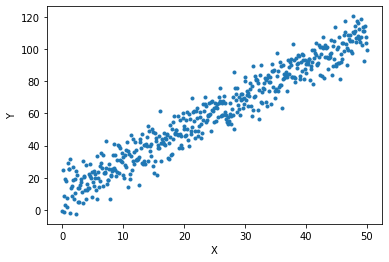

In [7]:
count_of__data = 500; c = 10
a_true = 2; b_true = 10
l_a = 0.0001;l_b = 0.01 

x = np.linspace(0, int(count_of__data/c), count_of__data)
y = np.linspace(0, count_of__data/c, count_of__data) * a_true + b_true + np.random.normal(0, 8, (count_of__data))
plt.plot(x, y, '.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

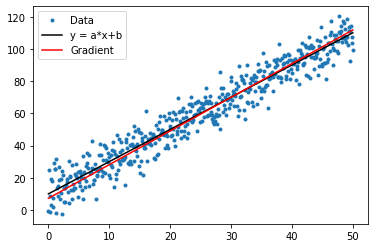

True a and b:  (2, 10) Our results:  (2.089824733856943, 7.238556643594118)



In [8]:
a, b = grad(x,y, l_a, l_b)
plt.plot(x, y, '.', label = "Data")
plt.plot(x, a_true*x + b_true, 'black', label='y = a*x+b')
plt.plot(x, a*x + b, 'red', label='Gradient')
plt.legend()
plt.show()
print("True a and b: ", (a_true, b_true), "Our results: ", (a, b))
print()

# Logistic regresion

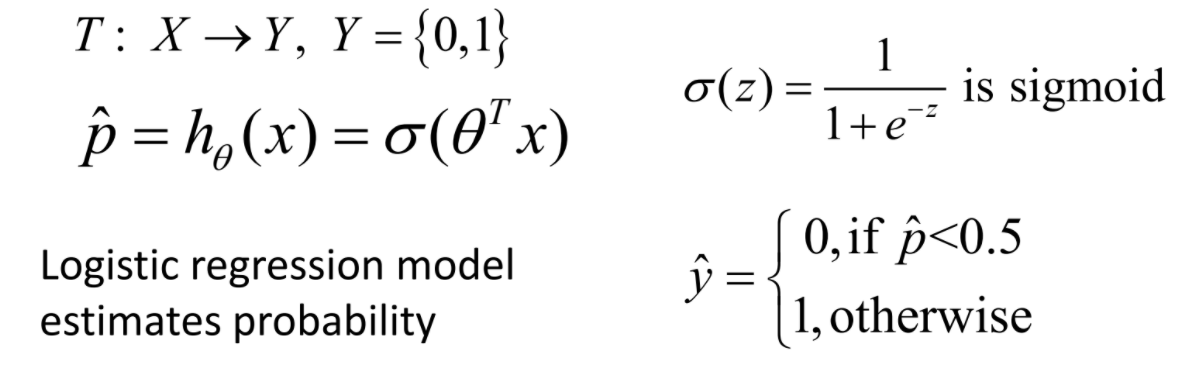

In [9]:
Image("IMG/Sig.png")

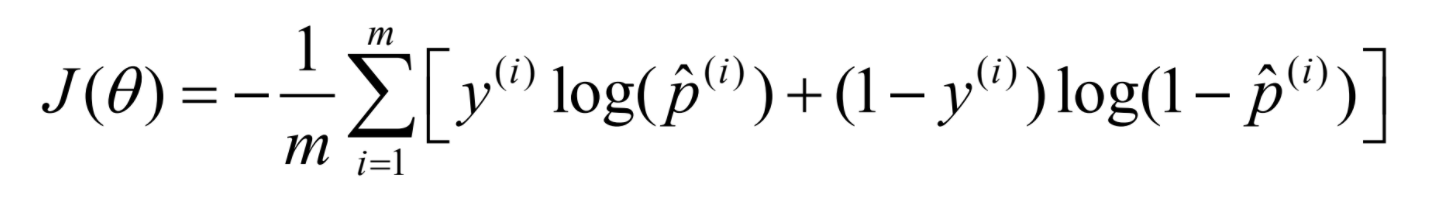

In [10]:
Image("IMG/Log_reg.png")

In [11]:
def p(a,b,x,y):
    f = 1/(1+np.exp(-(x.dot(a) + b)))
    da = np.dot(x.T, (f - y))/len(x); db = (f - y).mean()
    error = -(y * np.log(f) + (1-y) * np.log(1-f)).mean()
    return da, db, error
def pred(x, a, b):
    pred = np.zeros(len(x))
    f = 1/(1+np.exp(-(x.dot(a) + b)))
    for i in range(len(x)):
        if(f[i] >= 0.5):
            pred[i] = 1
    return pred
def grad_2(x, y,l_a,l_b, n):
    a = np.array([0,0]);b = 0
    errors = np.zeros(n)
    for i in range(n):
        da, db, errors[i] = p(a,b,x,y)
        a = a - l_a * da; b = b - l_b * db 
    return a, b, errors

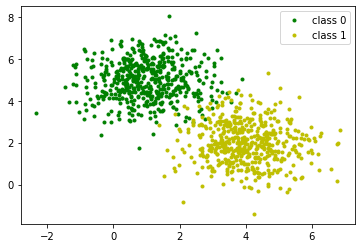

In [12]:
x1 = np.random.multivariate_normal([1,5], [[1, 0], [0, 1]], (count_of__data)); 
x2 = np.random.multivariate_normal([4,2], [[1, 0], [0, 1]], (count_of__data))
y1 = np.zeros(count_of__data, int);y2 = np.ones(count_of__data, int)
plt.plot(x1[:,0], x1[:,1], 'g.', label = "class 0")
plt.plot(x2[:,0], x2[:,1], 'y.', label = "class 1")
plt.legend()
plt.show()

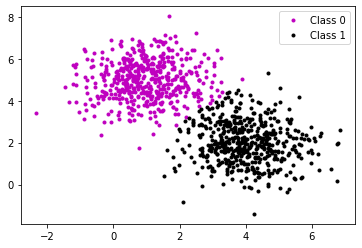

In [13]:
x = np.concatenate([x1,x2])
y = np.hstack([y1,y2])
n = 10000
a, b, errors = grad_2(x, y,l_a,l_b, n)
p = pred(x,a,b)
plt.plot(x[:,0][p==0], x[:,1][p==0], 'm.', label = "Class 0")
plt.plot(x[:,0][p==1], x[:,1][p==1], 'k.', label = "Class 1")
plt.legend()
plt.show()